## Q20 直方图显示
直方图显示了不同数值的像素出现的次数

*　一般来说直方图都是针对灰度图的

图像直方图的两个基本属性：range[0，255]和bins(组块)
直方图无空间信息
中间灰度级像素多，动态范围小，图像对比度低
直方图均匀分布时图像最清晰


### opencv函数
```
hist = cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 
```

* images参数表示输入图像，传入时应该用中括号[ ]括起来
* channels参数表示传入图像的通道，如果是灰度图像，那就不用说了，只有一个通道，值为0，如果是彩色图像（有3个通道），那么值为0,1,2,中选择一个，对应着BGR各个通道。这个值也得用[ ]传入。
* mask参数表示掩膜图像。如果统计整幅图，那么为None。主要是如果要统计部分图的直方图，就得构造相应的掩膜来计算。
* histSize参数表示灰度级的个数，需要中括号，比如[256]
* ranges参数表示像素值的范围，通常[0,256]。此外，假如channels为[0,1],ranges为[0,256,0,180],则代表0通道范围是0-256,1通道范围0-180。
* hist参数表示计算出来的直方图。


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

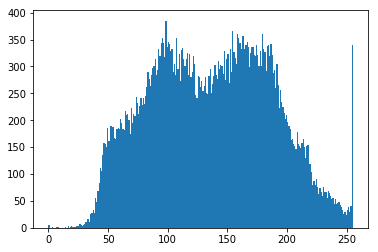

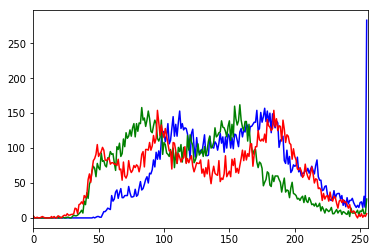

In [8]:
img = cv2.imread("gg.jpg")

# 使用plt
plt.figure()
# .ravel()：array类型对象的方法，ravel函数将多维数组降为一维，仍返回array数组，元素以列排列。
plt.hist(img.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.show()

# 使用opencv
color = ["blue", "green", "red"]  #画笔颜色的值可以为大写或小写或只写首字母或大小写混合
for i, color in enumerate(color):
   hist = cv2.calcHist([img], [i], None, [256], [0, 256])
   plt.plot(hist, color = color)
   plt.xlim([0, 256])
plt.show()


## Q21  直方图归一化（ Histogram Normalization ）

```
中文	             English	                  日本語	                具体作用
直方图匹配（规定化）	Histogram Matching ( Specification )	ヒストグラムマッチング	       将两张图像的累积分布函数调为一样
直方图均衡化	      Histogram Equalization	          ヒストグラム均等化（平坦化）	拉开灰度差别，增强对比度
直方图归一化	      Histogram Normalization	          ヒストグラム正規化	         将直方图所有分量限制在一定范围
```


有时直方图会存在偏差。比如说，数据集中在 0 处（左侧）的图像全体会偏暗，数据集中在255 处（右侧）的图像会偏亮。
如果直方图有所偏向，那么其动态范围（ dynamic range ）就会较低
为了使人能更清楚地看见图片，让直方图归一化、平坦化是十分必要的

这种归一化直方图的操作被称作灰度变换（Grayscale Transformation）。
像素点取值范围从 [c,d] 转换到 [a,b] 的过程由下式定义

```
xout = {  a                         (xin < c)
         (b-a) * (xin-c) /(d-c)   + a  (c <= xin <= d)
          b                         (d < xin)

```

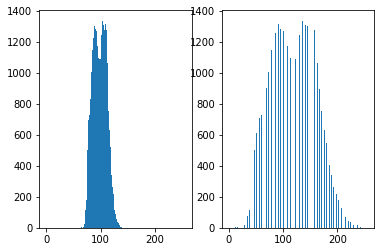

In [14]:
img = cv2.imread("gg_dark.jpg")
img_origin = img .copy()

c = img.min()
d = img.max()

# 需要转换的像素最大值与最小值
a = 0
b = 255

img_out = (b - a) * ((img - c)/(d - c))  + a
img_out[img_out < a] = a
img_out[img_out > b] = b


plt.figure()
plt.subplot(121)
plt.hist(img.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.subplot(122)
plt.hist(img_out.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.show()

